# Analyze Supermarket Data For Three States Across the Country.

Company Teejay owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
Combine the dataset from each branch (3 branches) into one dataset for easy analysis.

#### To-Do - Import Libraries

In [239]:
import os
from os import path
import glob
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')


#### To-Do - Use glob to match the pattern "csv"   

In [240]:
#Get current directory
os.getcwd()

'c:\\Users\\ahmed-tijani.suleima\\Teejay\\Analysis-of-supermarket-data-across-Nigeria'

In [241]:
#get all files with .csv suffix
files= glob.glob('./*.csv')

In [242]:
files      #checking the matched files in the list

['.\\Abuja_Branch.csv',
 '.\\dataset.csv',
 '.\\Lagos_Branch.csv',
 '.\\Port_Harcourt_Branch.csv',
 '.\\results.csv']

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [243]:
#convert all files to a pandas dataframe
# file_list= []
# for file in files:
#     df= pd.read_csv(file)
#     file_list.append(df)
file_list = [pd.read_csv(file) for file in files]
    


In [244]:
#file_list

In [245]:
#Concatenate dataframes and Export to csv


df2= pd.concat(file_list, axis=0)
if ( not path.exists('./dataset.csv')):
    df2.to_csv('./dataset.csv', index=False)

In [246]:
#df2.head()

#### To-Do -Read the CSV file using `pd.read_csv` method

In [247]:
df_1= pd.read_csv('./dataset.csv')

In [248]:
df_1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [249]:
df_1.shape

(1000, 17)

## Step 2 - Data Exploration


#### To-Do - Use the head() method to view first few rows of the dataset

In [250]:
df= df_1.copy()

In [251]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [252]:
df.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [253]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### Rename Columns

In [254]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [255]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [256]:
df.describe()

,unit_price,quantity,tax_5%,total,cogs,gross_margin_percentage,gross_income,rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


From the statistical summary it is seen that there are 1000 data values available for all columns. The average value for each column is shown in the second row. The percentile values are also shown as 25%, 50%, 75%. The 25th percentile is the value at which 25% of the answers lie below that value.

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [257]:
df.isnull().any()

invoice_id                 False
branch                     False
city                       False
customer_type              False
gender                     False
product_line               False
unit_price                 False
quantity                   False
tax_5%                     False
total                      False
date                       False
time                       False
payment                    False
cogs                       False
gross_margin_percentage    False
gross_income               False
rating                     False
dtype: bool

In [258]:
df.isnull().sum()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

In [259]:
df.notna().sum()

invoice_id                 1000
branch                     1000
city                       1000
customer_type              1000
gender                     1000
product_line               1000
unit_price                 1000
quantity                   1000
tax_5%                     1000
total                      1000
date                       1000
time                       1000
payment                    1000
cogs                       1000
gross_margin_percentage    1000
gross_income               1000
rating                     1000
dtype: int64

### Check for duplicates

In [260]:
df[df.duplicated()].count()

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5%                     0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_id               1000 non-null   object 
 1   branch                   1000 non-null   object 
 2   city                     1000 non-null   object 
 3   customer_type            1000 non-null   object 
 4   gender                   1000 non-null   object 
 5   product_line             1000 non-null   object 
 6   unit_price               1000 non-null   float64
 7   quantity                 1000 non-null   int64  
 8   tax_5%                   1000 non-null   float64
 9   total                    1000 non-null   float64
 10  date                     1000 non-null   object 
 11  time                     1000 non-null   object 
 12  payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross_margin_percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [262]:
df['date']= pd.to_datetime(df['date'])

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [263]:
df[['date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


#### To-Do - Repeat the two steps above to the `time` column

In [264]:
df['time']= pd.to_datetime(df['time'])

In [265]:
df[['time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [266]:
import datetime as dt

In [267]:
df['day']= (df['date']).dt.day_name()

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [268]:
df['month']= (df['date']).dt.month_name()

In [269]:
df.month.head()

0    February
1    February
2       March
3     January
4       March
Name: month, dtype: object

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [270]:
df['year']= (df['date']).dt.year

In [271]:
#df[['Year']]

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [272]:
df['hour']= (df['time']).dt.hour

In [273]:
#df[['Hour']]

#### To determine the numbers of unique hours of sales in the supermarket.

In [274]:
df['hour'].nunique()

11

In [275]:
df['hour'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

In [276]:
#Select all colums of Object Data type.
categorical_columns = [column for column in df.columns if df[column].dtype == "object" ]
categorical_columns

['invoice_id',
 'branch',
 'city',
 'customer_type',
 'gender',
 'product_line',
 'payment',
 'day',
 'month']

In [277]:
#Get Unique Values from Branch
df['branch'].unique().tolist()

['B', 'A', 'C']

In [278]:

categorical_columns = [e for e in categorical_columns if e not in ('branch', 'invoice_id','date','time')]

In [279]:
print(categorical_columns)

['city', 'customer_type', 'gender', 'product_line', 'payment', 'day', 'month']


In [280]:
for i in categorical_columns:
    print("The unique values in {} are:{}". format(i, df[i].unique().tolist()))
    

The unique values in city are:['Abuja', 'Lagos', 'Port Harcourt']
The unique values in customer_type are:['Member', 'Normal']
The unique values in gender are:['Female', 'Male']
The unique values in product_line are:['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty']
The unique values in payment are:['Card', 'Epay', 'Cash']
The unique values in day are:['Wednesday', 'Saturday', 'Tuesday', 'Monday', 'Friday', 'Thursday', 'Sunday']
The unique values in month are:['February', 'March', 'January']


In [281]:
#Check data distribution among cities
df['city'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: city, dtype: int64

## Step 5 - Data Aggregration

In [282]:
#Group data by cities.
cities= df.groupby(['city'])
cities

#### Gross income of each city.

In [283]:
cities[['gross_income']].sum()

,gross_income
city,
Abuja,1820531.52
Lagos,1820577.78
Port Harcourt,1895463.54


In [284]:
quantity= df.groupby(['product_line'])

In [285]:
quantity[['total']].sum()

,total
product_line,
Electronic accessories,19561511.34
Fashion accessories,19550122.20
Food and beverages,20212143.84
Health and beauty,17709746.04
Home and lifestyle,19390288.68
Sports and travel,19844217.54


## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

<AxesSubplot:xlabel='quantity', ylabel='Density'>

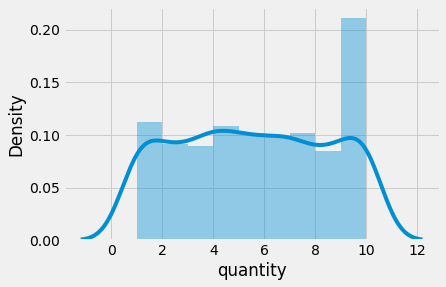

In [286]:
sns.distplot(df['quantity'],)

#### Most used Payment method.

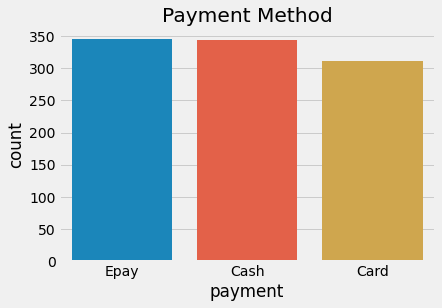

In [287]:
sns.countplot(x='payment', data= df, order = df.payment.value_counts().index).set_title('Payment Method');

#### Most product Line Unit sold.

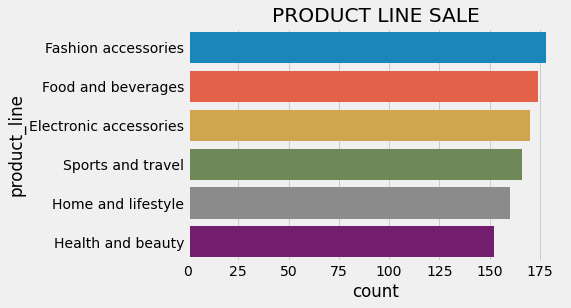

In [288]:
sns.countplot(y='product_line',order = df.product_line.value_counts().index, data= df ).set_title('PRODUCT LINE SALE');

From the plot above, the most used payment method was E-pay

#### City with the most total units sold.

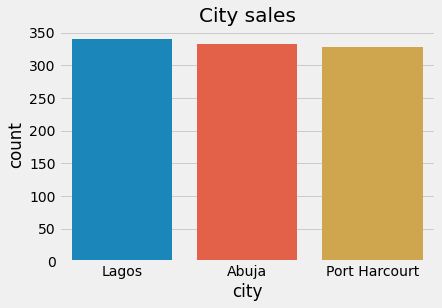

In [289]:
sns.countplot(x='city', data= df, order = df.city.value_counts().index).set_title('City sales');

`As seen from the plot, The city of Lagos has the most Sales. `

#### Customer Type Distribution In Cities

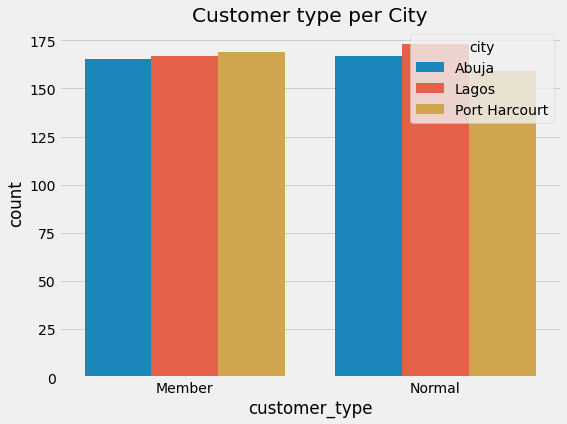

In [290]:
plt.figure(figsize=(8,6))
sns.countplot(x='customer_type',hue='city', data= df ).set_title('Customer type per City');

### To determine the gender that spends the most for each city.

In [291]:
gender_total= df.groupby(['city','gender'])[['total']].sum()
gender_total = gender_total.reset_index()
gender_total

,city,gender,total
0,Abuja,Female,19054186.20
1,Abuja,Male,19176975.72
2,Lagos,Female,19176900.12
3,Lagos,Male,19055233.26
4,Port Harcourt,Female,22206766.68
5,Port Harcourt,Male,17597967.66


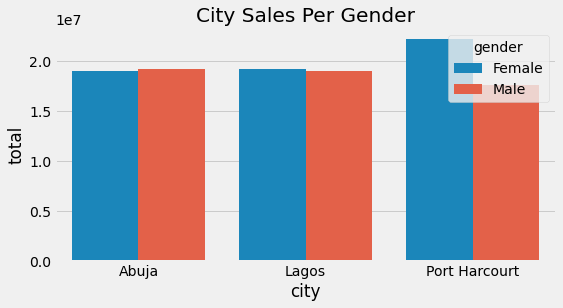

In [292]:
plt.figure(figsize=(8,4))
sns.barplot(x='city', y= 'total', hue='gender', data=gender_total).set_title('City Sales Per Gender');

From the plot above plot, ladies spend more in Port Harcourt. So let's find out the product line ladies in portharcourt spend more on.

In [293]:
Ladies_ph=df.query('city == "Port Harcourt" & gender =="Female"')

In [294]:
Ladies_ph.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,time,payment,cogs,gross_margin_percentage,gross_income,rating,day,month,year,hour
672,226-31-3081,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,...,2022-09-17 10:29:00,Cash,27504.0,4.761905,1375.20,9.6,Friday,March,2019,10
674,315-22-5665,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,...,2022-09-17 11:38:00,Epay,264816.0,4.761905,13240.80,8.0,Sunday,February,2019,11
676,183-56-6882,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,...,2022-09-17 10:42:00,Epay,143164.8,4.761905,7158.24,7.5,Wednesday,February,2019,10
677,232-16-2483,C,Port Harcourt,Member,Female,Sports and travel,24523.2,1,1226.16,25749.36,...,2022-09-17 12:28:00,Epay,24523.2,4.761905,1226.16,6.8,Monday,January,2019,12
678,333-73-7901,C,Port Harcourt,Normal,Female,Health and beauty,19771.2,8,7908.48,166078.08,...,2022-09-17 13:24:00,Epay,158169.6,4.761905,7908.48,7.6,Saturday,March,2019,13


In [295]:
Ladies_ph_agg=Ladies_ph.groupby(['product_line'])[['total']].sum()
Ladies_df= Ladies_ph_agg.reset_index()
Ladies_df

,product_line,total
0,Electronic accessories,3228917.58
1,Fashion accessories,4147087.14
2,Food and beverages,5638017.42
3,Health and beauty,2320466.40
4,Home and lifestyle,2823455.88
5,Sports and travel,4048822.26


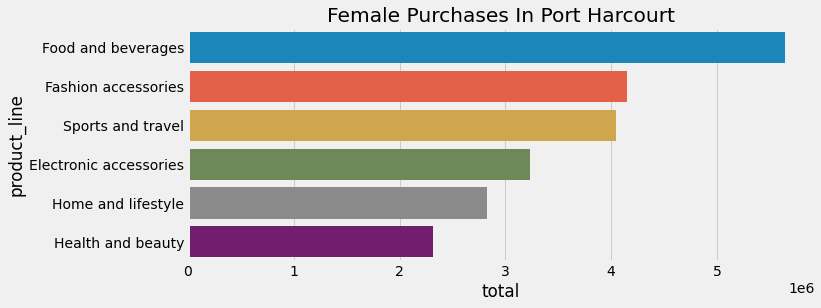

In [296]:
plt.figure(figsize=(10,4))
sns.barplot(y='product_line', x= 'total',order=Ladies_df.sort_values('total',ascending = False).product_line, data=Ladies_df).set_title('Female Purchases In Port Harcourt');


From the visualizion above we can see that females in Port Harcourt spend more on food and beverages.

### Most used Payment method for each City.

In [297]:
state_payments= df.groupby(['city','payment'])[['invoice_id']].count()
state_df= state_payments.reset_index()
state_df

,city,payment,invoice_id
0,Abuja,Card,109
1,Abuja,Cash,110
2,Abuja,Epay,113
3,Lagos,Card,104
4,Lagos,Cash,110
5,Lagos,Epay,126
6,Port Harcourt,Card,98
7,Port Harcourt,Cash,124
8,Port Harcourt,Epay,106


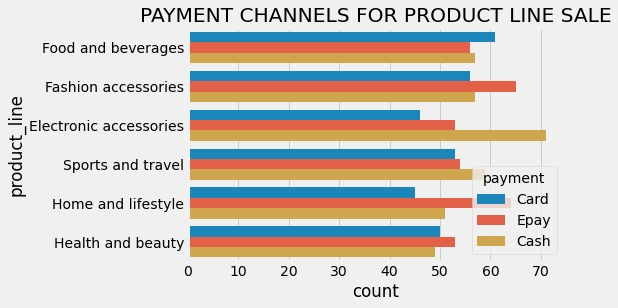

In [298]:
sns.countplot(y='product_line', data= df, hue='payment' ).set_title('PAYMENT CHANNELS FOR PRODUCT LINE SALE');

#### To Determine the branch with the lowest rating.

<AxesSubplot:xlabel='branch', ylabel='rating'>

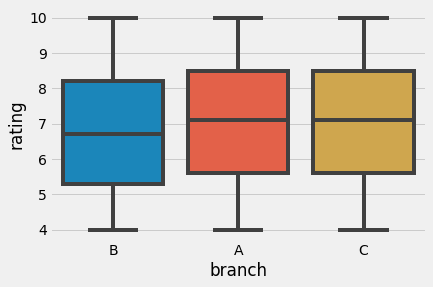

In [299]:
sns.boxplot(x='branch',y='rating', data=df)

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>



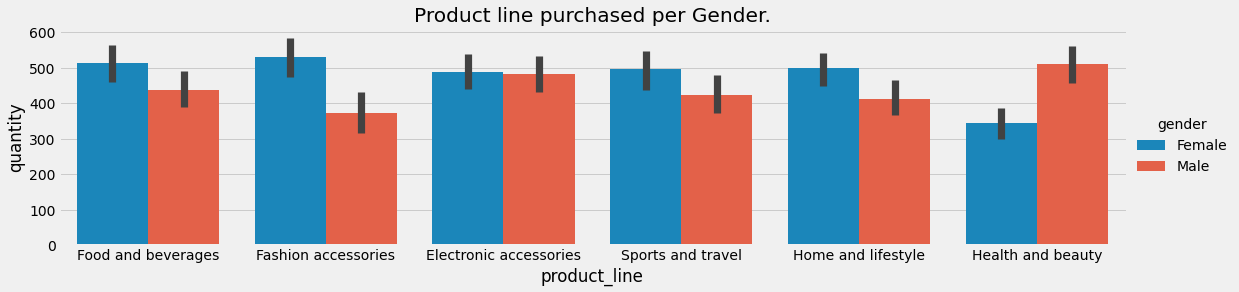

In [300]:
sns.catplot(x='product_line', y='quantity', data=df, hue='gender', kind='bar', estimator=np.sum, height= 4, aspect=4)
plt.title('Product line purchased per Gender.');

#### Product Line Purchased Per city

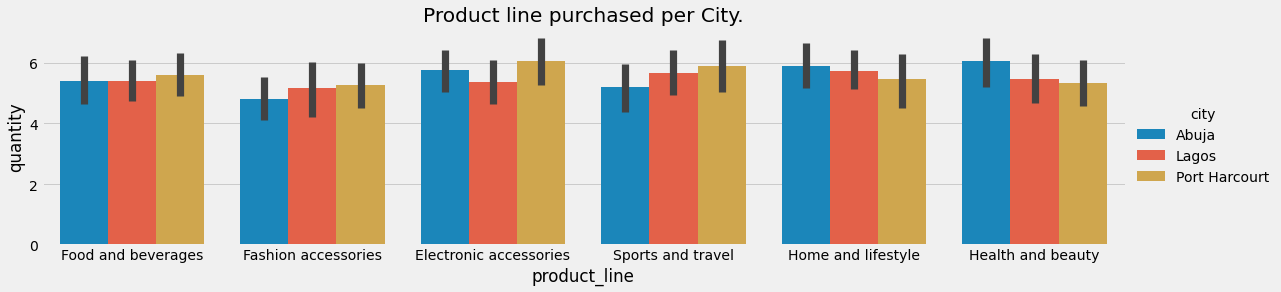

In [301]:
sns.catplot(x='product_line', y='quantity', data=df, hue='city', height= 4,aspect=4, kind='bar')
plt.title('Product line purchased per City.');

### To check the correlation between variables

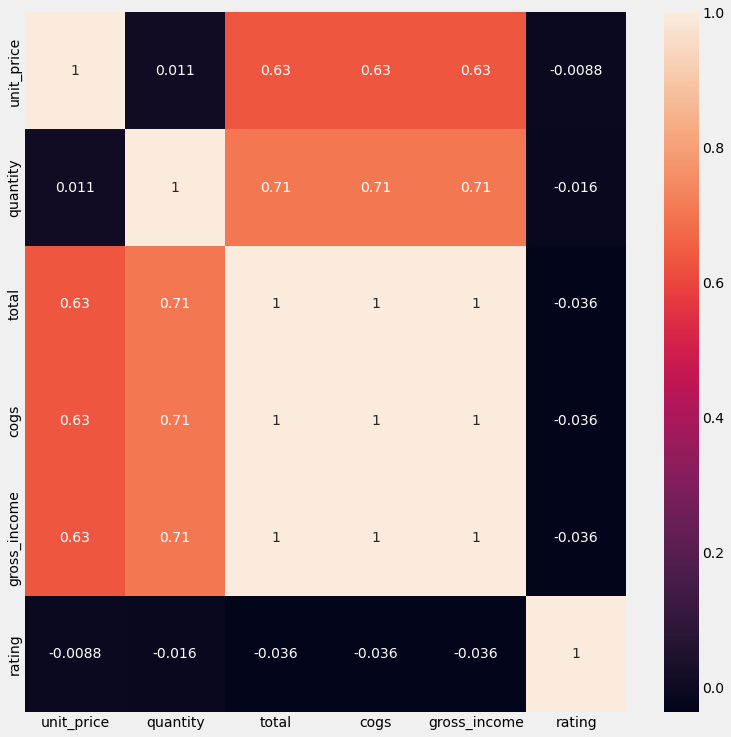

In [302]:
plt.figure(figsize=(12, 12))
a=df[[ 'product_line', 'unit_price', 'quantity','total','payment', 'cogs', 'gross_income',
       'rating']]
sns.heatmap(a.corr(), annot= True);

The correlation plot shows good positive correlation between values such as Gross income, cogs , total against Quantity.

### To check the product lines each gender spends most on in Lagos

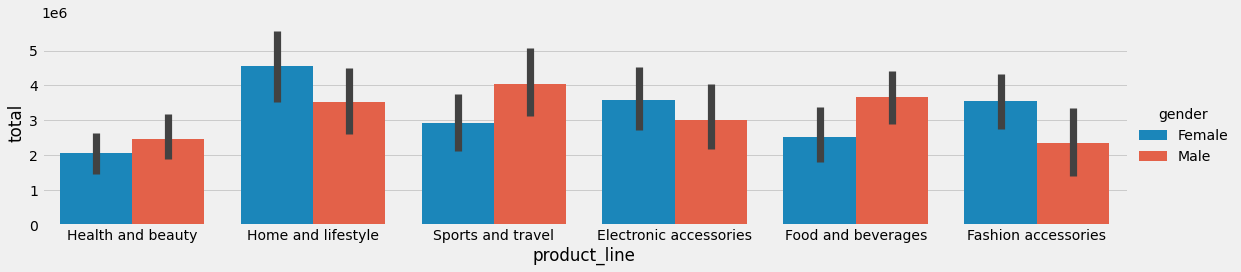

In [303]:
l=df[ (df['city']=='Lagos') ]
sns.catplot(x='product_line', y='total', data=l, hue='gender', kind='bar', estimator=np.sum, height= 4, aspect=4)

### To check the product lines each gender spends most on in Abuja

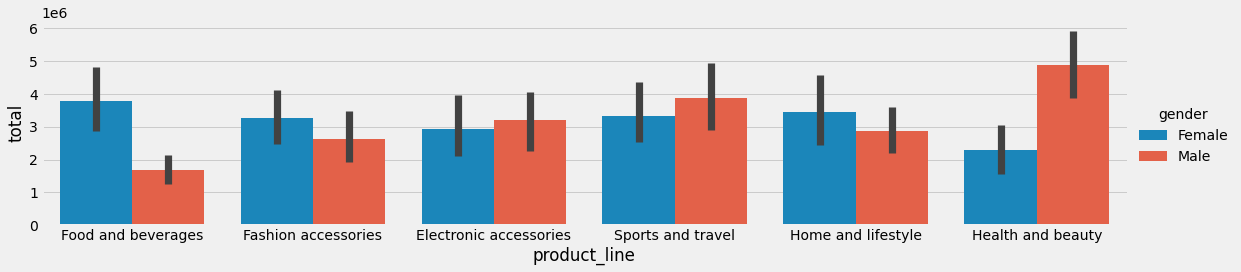

In [304]:
b=df[ (df['city']=='Abuja') ]
sns.catplot(x='product_line', y='total', data=b, hue='gender', kind='bar', estimator=np.sum, height= 4, aspect=4)

### To determine the Hour where the Highest total sales is made.

Text(0.5, 1.0, 'Total sales per Hour')

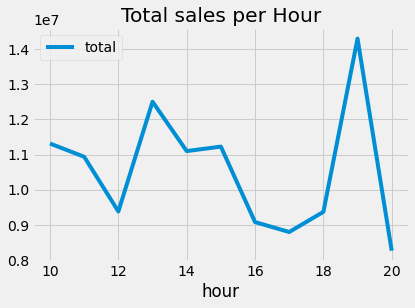

In [305]:

df.groupby(['hour'])[['total']].sum().plot.line().set_title('Total sales per Hour')

The highest sales is made between the hours of 7pm.

Lets Find out the productline with the highest sales at 7pm(19:00)

In [306]:
Most_sales= df.query('hour == 19')
Most_sales_grp = Most_sales.groupby(['product_line'])[['total']].sum()
Most_sales_grp.reset_index(inplace=True)
Most_sales_grp

,product_line,total
0,Electronic accessories,2079774.90
1,Fashion accessories,2209375.98
2,Food and beverages,2873332.98
3,Health and beauty,1931549.76
4,Home and lifestyle,1987221.60
5,Sports and travel,3210569.46


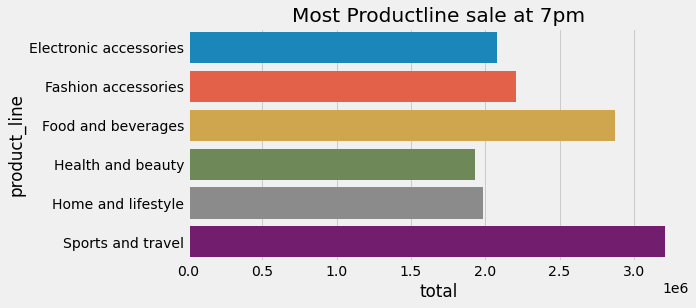

In [307]:
plt.figure(figsize=(8,4))
sns.barplot(x='total', y= 'product_line',  data=Most_sales_grp).set_title('Most Productline sale at 7pm');

#### Day with the highest total sales

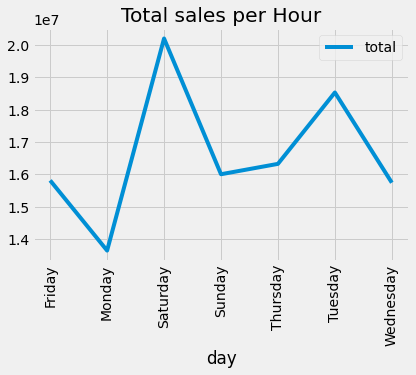

In [308]:
df.groupby(['day'])[['total']].sum().plot.line().set_title('Total sales per Hour')
plt.xticks(rotation='vertical');

#### Lets Look at the Moving average of gross income across the months of sales

In [309]:
moving_avg= df.copy() #Create a copy of the data set
moving_avg.sort_values(by='date', inplace=True) # sort the data by date

In [310]:
moving_grp=moving_avg.groupby(['month','date'])[['gross_income']].sum() #group data by month and date so we get unique data for each day.
moving_grp.reset_index(inplace=True)

In [311]:
moving_grp['moving_average'] = moving_grp.gross_income.rolling(window=7).mean() #create 7 day moving average

In [312]:
moving_grp.dropna(inplace=True) #drop null values

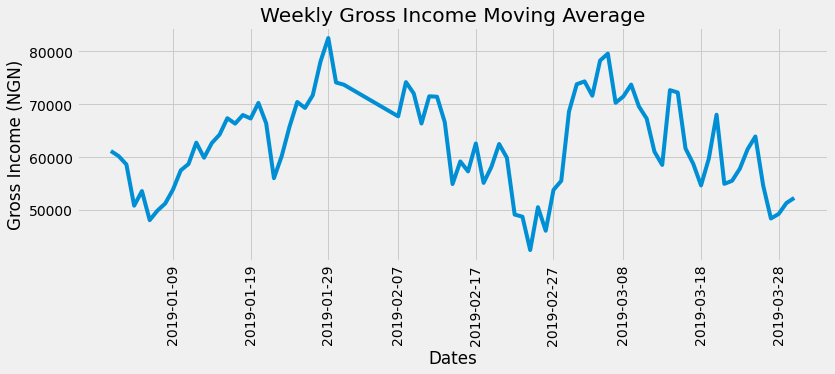

In [313]:
plt.figure(figsize=(12, 4))
plt.title('Weekly Gross Income Moving Average')
sns.lineplot(x='date', y='moving_average', data=moving_grp)
plt.xlabel('Dates')
plt.ylabel('Gross Income (NGN)')
plt.xticks(moving_grp.date[::10], rotation='vertical')
plt.show()